### Notebook to parse and clean the TCGA data from UCSC Xena

In [23]:
# libraries
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
## directory and file names
dir_data = '/mnt/d/Research/Omics/Xena/data'

file_tpm = dir_data + '/' + 'TcgaTargetGtex_rsem_gene_tpm.gz'
file_tpm_txt = dir_data + '/' + 'TcgaTargetGtex_rsem_gene_tpm'
file_tpm_pkl = dir_data + '/' + 'TcgaTargetGtex_rsem_gene_tpm.pkl'
file_tpm_pqt = dir_data + '/' + 'TcgaTargetGtex_rsem_gene_tpm_long.parquet'
file_phenotype = dir_data + '/' + 'TcgaTargetGTEX_phenotype.txt'
file_category = dir_data + '/' + 'TCGA_GTEX_category.txt'
file_probe = dir_data + '/' + 'gencode.v23.annotation.gene.probemap.tsv'


#### Read and summarize 

In [3]:
## tpm data
df_tpm = pd.read_csv(file_tpm, sep='\t', header=0, index_col=0, compression='gzip')
print(df_tpm.shape)

(60498, 19131)


In [4]:
## column names and row names
colnames = df_tpm.columns
rownames = df_tpm.index

print(colnames[0:5])
print(rownames[0:5])


## save tpm data as in pickle format
df_tpm.to_pickle(file_tpm_pkl)

Index(['GTEX-S4Q7-0003-SM-3NM8M', 'TCGA-19-1787-01', 'TCGA-S9-A7J2-01',
       'GTEX-QV31-1626-SM-2S1QC', 'TCGA-G3-A3CH-11'],
      dtype='object')
Index(['ENSG00000242268.2', 'ENSG00000259041.1', 'ENSG00000270112.3',
       'ENSG00000167578.16', 'ENSG00000278814.1'],
      dtype='object', name='sample')


#### convert tpm wide to long format df


In [ ]:
## read tpm data from pickle format
df_tpm = pd.read_pickle(file_tpm_pkl)
# df_tpm.to_pickle(file_tpm_pkl)


# wide to long
df_tpm_long = df_tpm.melt()

In [8]:
# get current working directory
cwd = os.getcwd()
print(cwd)


d:\Research\Omics\Xena\scripts


##### Read RNAseq expression data 
- Read the expression csv file with POLARS
- Transform to long format

In [4]:
df_pl_tpm = pl.read_csv(file_tpm, separator='\t', low_memory=True)
# df_pl_tpm = (pl.read_csv(file_tpm, separator='\t', low_memory=True).melt(id_vars=['sample'], value_name='tpm'))

In [7]:
df_pl_tpm.head()

sample,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,TCGA-B5-A5OE-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-B2-5641-11,GTEX-ZPCL-0126-SM-4WWC8,TARGET-20-PANGDN-09,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,TCGA-IR-A3L7-01,TCGA-05-4420-01,TCGA-91-6840-01,GTEX-13W3W-2626-SM-5SIA2,GTEX-WQUQ-2526-SM-4MVNO,TCGA-R6-A8WC-01,GTEX-P44H-0526-SM-2XCF1,TCGA-B6-A402-01,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-D5-6929-01,GTEX-11ONC-2326-SM-5HL6P,GTEX-TSE9-0126-SM-3DB83,GTEX-R55F-0226-SM-48FCI,TCGA-EJ-7125-01,GTEX-13O3P-0226-SM-5KM3Z,TCGA-L5-A4OH-01,GTEX-VJYA-0005-SM-3P5ZD,TCGA-AX-A3G6-01,…,GTEX-1122O-2126-SM-5EGIR,GTEX-1313W-0011-R1b-SM-5EQ4A,GTEX-13NZA-0526-SM-5L3D7,GTEX-Y8LW-0626-SM-4VDS8,GTEX-WI4N-2026-SM-4OOS7,TCGA-BR-8588-01,GTEX-QMRM-0826-SM-3NB33,GTEX-R55E-0008-SM-48FCG,TCGA-78-7160-01,TCGA-77-6844-01,TCGA-BR-4255-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-AA-3660-01,TCGA-13-1481-01,GTEX-1399R-0426-SM-5IJE3,GTEX-YFCO-1626-SM-4W1Z3,TARGET-20-PANSJB-09,TCGA-A8-A09K-01,TCGA-HT-7603-01,TCGA-B5-A3S1-01,GTEX-OOBK-2626-SM-2HMKY,TCGA-A2-A1FV-01,GTEX-OHPJ-0006-SM-3LK6G,TCGA-95-7947-01,GTEX-1117F-2826-SM-5GZXL,TCGA-FI-A2EY-01,TCGA-55-6985-11,TCGA-EJ-5527-01,TCGA-G3-A25X-01,TCGA-24-2254-01,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ENSG0000024226…",-3.458,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-2.7274,-3.458,-9.9658,-9.9658,-3.458,-2.5479,-2.8262,-9.9658,-9.9658,-9.9658,-9.9658,-3.6259,-9.9658,-4.035,-9.9658,-9.9658,-0.6873,-9.9658,-0.8599,-9.9658,-2.8262,-9.9658,-1.7809,-9.9658,-9.9658,-9.9658,…,-9.9658,-1.5522,-9.9658,-9.9658,-9.9658,-9.9658,-1.6394,-9.9658,-2.6349,-9.9658,-9.9658,-9.9658,-9.9658,-3.458,-9.9658,-4.6082,-1.5105,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-2.5479,-3.3076,-9.9658,-9.9658,-3.6259,-4.035,-2.0529,-9.9658,-9.9658,-1.9379,1.5165,-9.9658,-2.3884,0.044,-3.3076
"""ENSG0000025904…",-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,…,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
"""ENSG0000027011…",-3.6259,-3.816,-3.0469,-2.1779,-9.9658,-9.9658,-1.8314,-2.4659,-9.9658,-9.9658,-9.9658,-3.1714,-9.9658,-5.0116,-1.2481,-6.5064,-9.9658,-9.9658,-9.9658,-9.9658,-0.5332,-9.9658,-6.5064,-6.5064,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-5.5735,-5.5735,-6.5064,-6.5064,-4.6082,-9.9658,-9.9658,…,-9.9658,0.688,-0.7834,-6.5064,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-4.2934,-5.0116,-9.9658,-4.6082,-3.3076,-1.9942,-9.9658,-9.9658,1.0642,-5.5735,-9.9658,-5.5735,-9.9658,-6.5064,-9.9658,-3.1714,-4.2934,-9.9658,-9.9658,-5.5735,-2.9324,-9.9658,-9.9658,2.5852,-3.0469
"""ENSG0000016757…",4.5988,5.2998,4.8881,4.6294,3.5572,5.0858,6.4989,4.6317,5.5358,4.1376,3.7269,5.5696,4.9782,5.7035,3.0181,5.8726,4.6201,4.8827,4.2048,5.9248,3.4583,5.2126,3.8581,5.6801,4.1252,5.4916,4.5142,5.0786,5.8286,3.9929,6.2578,5.3162,5.2083,5.1235,5.1194,5.615,…,4.562,6.1258,2.5972,4.8758,2.0844,3.9599,5.7785,4.1498,5.3064,5.2308,3.913721,4.1044,6.6567,4.9626,4.8739,4.6955,2.9356,5.0041,4.4476,5.5364,6.856,4.2

In [8]:
(df_pl_tpm.head().melt(id_vars=['sample'], value_name='tpm'))

sample,variable,tpm
str,str,f64
"""ENSG0000024226…","""GTEX-S4Q7-0003…",-3.458
"""ENSG0000025904…","""GTEX-S4Q7-0003…",-9.9658
"""ENSG0000027011…","""GTEX-S4Q7-0003…",-3.6259
"""ENSG0000016757…","""GTEX-S4Q7-0003…",4.5988
"""ENSG0000027881…","""GTEX-S4Q7-0003…",-9.9658
"""ENSG0000024226…","""TCGA-19-1787-0…",-9.9658
"""ENSG0000025904…","""TCGA-19-1787-0…",-9.9658
"""ENSG0000027011…","""TCGA-19-1787-0…",-3.816
"""ENSG0000016757…","""TCGA-19-1787-0…",5.2998


In [5]:
### polars read csv file with scan_csv in lazy mode, melt and sink to parquet

df_pl_tpm = (pl.scan_csv(file_tpm_txt, separator='\t', low_memory=True)
            .melt(id_vars=['sample'], value_name='tpm')
            # .collect(streaming=True))
            .sink_parquet("file_tpm_pqt.parquet"))


In [7]:
## read parket file and show the first 5 rows
df_parquet_tpm = pl.scan_parquet("file_tpm_pqt.parquet").head()
df_parquet_tpm.collect()


sample,variable,tpm
str,str,f64
"""ENSG0000024226…","""GTEX-S4Q7-0003…",-3.458
"""ENSG0000025904…","""GTEX-S4Q7-0003…",-9.9658
"""ENSG0000027011…","""GTEX-S4Q7-0003…",-3.6259
"""ENSG0000016757…","""GTEX-S4Q7-0003…",4.5988
"""ENSG0000027881…","""GTEX-S4Q7-0003…",-9.9658


##### Parse and format annotation and sample information

In [13]:
# file_phenotype = dir_data + '/' + 'TcgaTargetGtex_phenotype.txt'
# file_category = dir_data + '/' + 'TCGA_GTEX_category.txt'
# file_probe = dir_data + '/' + 'gencode.v23.annotation.gene.probemap.tsv'

print(file_phenotype)
# data/TcgaTargetGTEX_phenotype.txt.gz



# : with open('test_original.csv', 'r', encoding='big5') as fh:
#     ...:     df = pl.read_csv(fh.read().encode('utf-8'))

/home/ec2-user/projects/omics_analysis/data/TcgaTargetGTEX_phenotype.txt.gz


##### Read sample and gene metadata

In [12]:
## phenotype data
with open(file_phenotype, 'r', encoding='big5') as fh:
    df_phenotype = pl.read_csv(fh.read().encode('utf-8'),separator='\t', low_memory=True).lazy()

# df_phenotype = (pl.scan_csv(file_phenotype, separator='\t', low_memory=True)
#             .collect(streaming=True))


## category data
df_category = (pl.scan_csv(file_category, separator='\t', low_memory=True)
            .collect(streaming=True))

## probe data
df_probe = (pl.scan_csv(file_probe, separator='\t', low_memory=True)
            .collect(streaming=True))

In [13]:
df_phenotype.head()

sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
str,str,str,str,str,str,str
"""TCGA-V4-A9EE-0…","""Uveal Melanoma…","""Uveal Melanoma…","""Eye""","""Primary Tumor""","""Male""","""TCGA"""
"""TCGA-VD-AA8N-0…","""Uveal Melanoma…","""Uveal Melanoma…","""Eye""","""Primary Tumor""","""Male""","""TCGA"""
"""TCGA-V4-A9EI-0…","""Uveal Melanoma…","""Uveal Melanoma…","""Eye""","""Primary Tumor""","""Male""","""TCGA"""
"""TCGA-VD-AA8O-0…","""Uveal Melanoma…","""Uveal Melanoma…","""Eye""","""Primary Tumor""","""Male""","""TCGA"""
"""TCGA-WC-A888-0…","""Uveal Melanoma…","""Uveal Melanoma…","""Eye""","""Primary Tumor""","""Male""","""TCGA"""


In [14]:
df_category.head()

sample,TCGA_GTEX_main_category
str,str
"""GTEX-1117F-242…","""GTEX Uterus"""
"""GTEX-113JC-222…","""GTEX Uterus"""
"""GTEX-11DXX-152…","""GTEX Uterus"""
"""GTEX-11EM3-192…","""GTEX Uterus"""
"""GTEX-11I78-212…","""GTEX Uterus"""


In [15]:
df_probe_select = df_probe.select(pl.col(["id", "gene"]))
df_probe_select.schema

{'id': Utf8, 'gene': Utf8}

##### Join expression data with phenotype metadata

In [13]:
## join TCGA tpm data with phenotype data
df_pl_tpm_pheno = (pl.scan_parquet("file_tpm_pqt.parquet")
                .join(df_phenotype, left_on="variable",right_on='sample', how='left')
                .sink_parquet("file_tpm_pheno_pqt.parquet"))

TypeError: Expected 'other' join table to be a LazyFrame, not a DataFrame

In [10]:
df_parquet_tmp = pl.scan_parquet("file_tpm_pheno_pqt.parquet").head()
df_parquet_tmp.collect()

sample,variable,tpm,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
str,str,f64,str,str,str,str,str,str
"""ENSG0000024226…","""GTEX-S4Q7-0003…",-3.458,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX"""
"""ENSG0000025904…","""GTEX-S4Q7-0003…",-9.9658,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX"""
"""ENSG0000027011…","""GTEX-S4Q7-0003…",-3.6259,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX"""
"""ENSG0000016757…","""GTEX-S4Q7-0003…",4.5988,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX"""
"""ENSG0000027881…","""GTEX-S4Q7-0003…",-9.9658,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX"""


##### Join expression data with gene (probe) metadata

In [23]:
# .join(df_probe_select, left_on="sample",right_on='id', how='left')
df_pl_tpm_pheno = (pl.scan_parquet("file_tpm_pheno_pqt.parquet")
                .join(df_probe_select.lazy(), left_on="sample",right_on='id', how='left')
                .sink_parquet("file_tpm_pheno_gene_pqt.parquet"))

In [24]:
df_parquet_tmp = pl.scan_parquet("file_tpm_pheno_gene_pqt.parquet").head()
df_parquet_tmp.collect()

sample,variable,tpm,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study,gene
str,str,f64,str,str,str,str,str,str,str
"""ENSG0000024226…","""GTEX-S4Q7-0003…",-3.458,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX""","""RP11-368I23.2"""
"""ENSG0000025904…","""GTEX-S4Q7-0003…",-9.9658,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX""","""RP11-167B3.1"""
"""ENSG0000027011…","""GTEX-S4Q7-0003…",-3.6259,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX""","""RP11-742D12.2"""
"""ENSG0000016757…","""GTEX-S4Q7-0003…",4.5988,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX""","""RAB4B"""
"""ENSG0000027881…","""GTEX-S4Q7-0003…",-9.9658,"""Cells - Ebv-Tr…","""Cells - Ebv-Tr…","""Blood""","""Cell Line""","""Male""","""GTEX""","""AC104071.1"""


##### EDA analysis of study data
- Phenotype from studies: Primary_site, Study_id, etc

In [19]:


## phenotype data
with open(file_phenotype, 'r', encoding='big5') as fh:
    df_phenotype = pl.read_csv(fh.read().encode('utf-8'),separator='\t', low_memory=True)

# Get summary statistics for each column of df_phenotype
pd_df_phenotype = df_phenotype.to_pandas()

_study
GTEX      31
TARGET     3
TCGA      29
Name: _primary_site, dtype: int64


<Axes: xlabel='_study'>

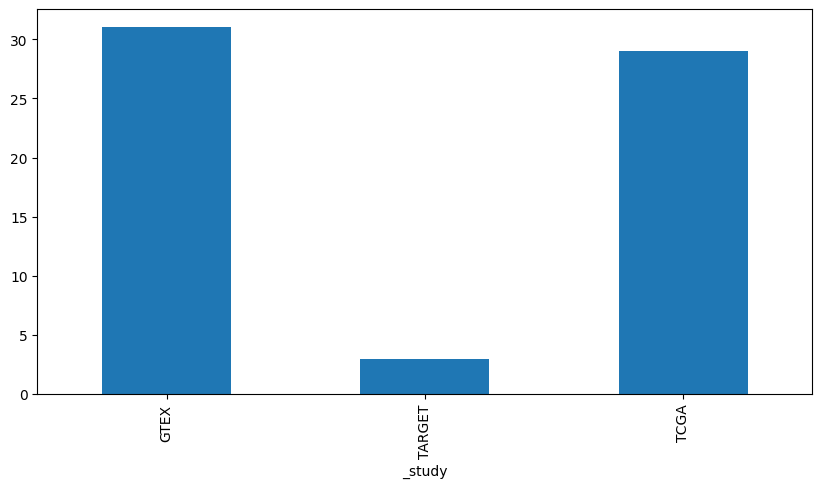

In [33]:
## unique primary site for each study type
pd_df_phenotype_unique = pd_df_phenotype.groupby(['_study'])['_primary_site'].agg('nunique')

print(pd_df_phenotype_unique)
# plot the summary statistics
pd_df_phenotype_unique.plot(kind='bar', stacked=True, figsize=(10, 5))

<Axes: title={'center': 'TCGA'}, xlabel='primary site', ylabel='sample count'>

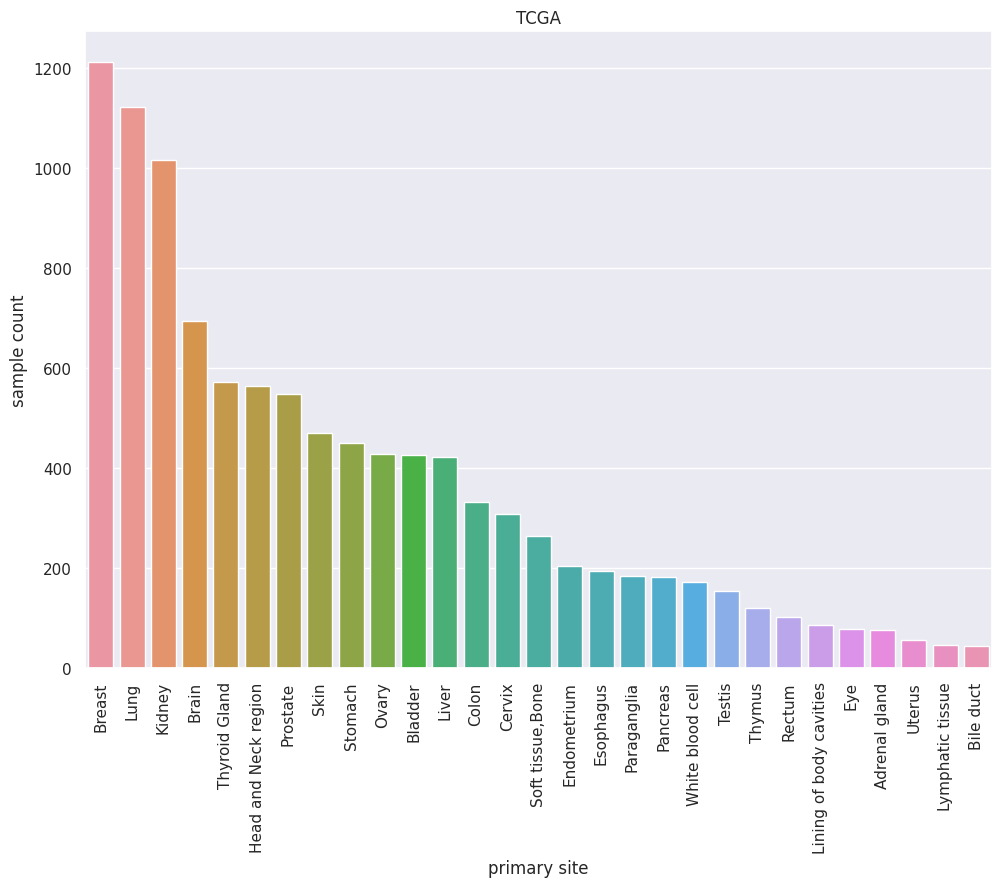

In [43]:
# count number of samples for each study type and primary site

list_study = ['TCGA', 'TARGET', 'GTEX']

def plot_sample_count(input_df: pd.DataFrame, study: str):
    sample_count = input_df[input_df['_study'] == study]['_primary_site'].value_counts()

    # seaborn barplot count of samples for each primary site
    # sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns_plot = sns.barplot(x=sample_count.index, y=sample_count.values)
    sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
    sns_plot.set_title(study)
    sns_plot.set_xlabel('primary site')
    sns_plot.set_ylabel('sample count')
    display(sns_plot)
    # sns_plot.figure.savefig(study + '_sample_count.png'



## TCGA sample count
plot_sample_count(pd_df_phenotype, 'TCGA')




<Axes: title={'center': 'GTEX'}, xlabel='primary site', ylabel='sample count'>

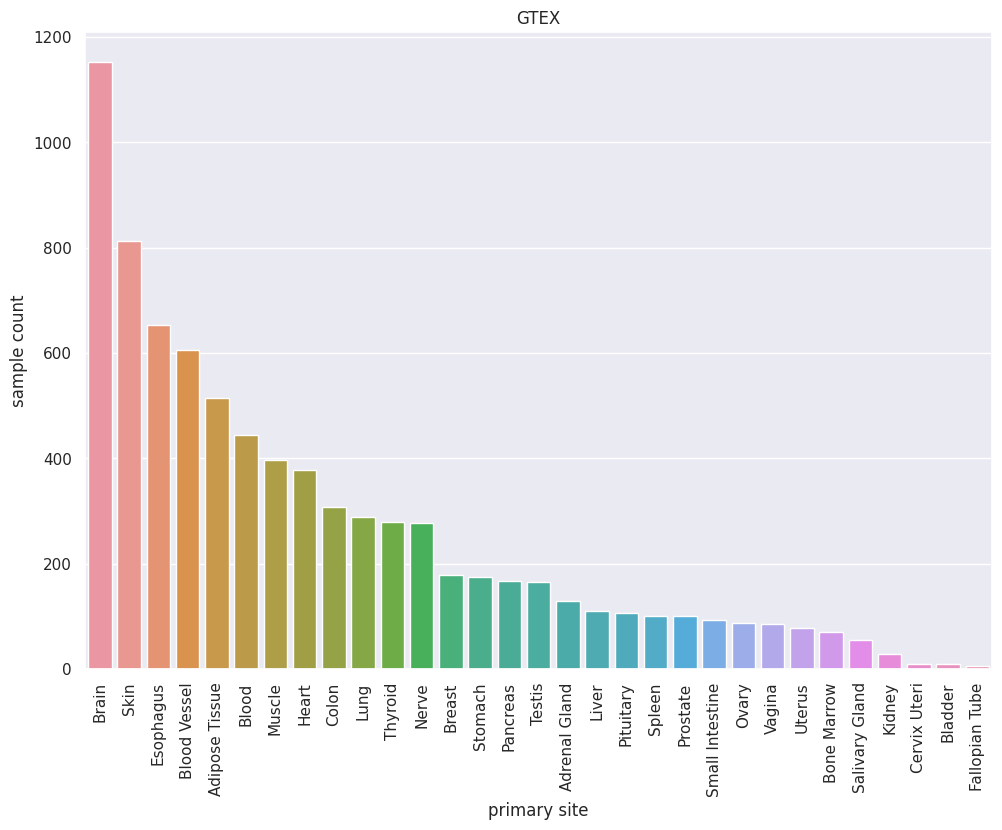

In [45]:

## GTEX sample count
plot_sample_count(pd_df_phenotype, 'GTEX')

<Axes: title={'center': 'TARGET'}, xlabel='primary site', ylabel='sample count'>

/mnt/d/Research/Omics/Xena/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 33407 (\N{CJK UNIFIED IDEOGRAPH-827F}) missing from current font.
  func(*args, **kwargs)
/mnt/d/Research/Omics/Xena/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33407 (\N{CJK UNIFIED IDEOGRAPH-827F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


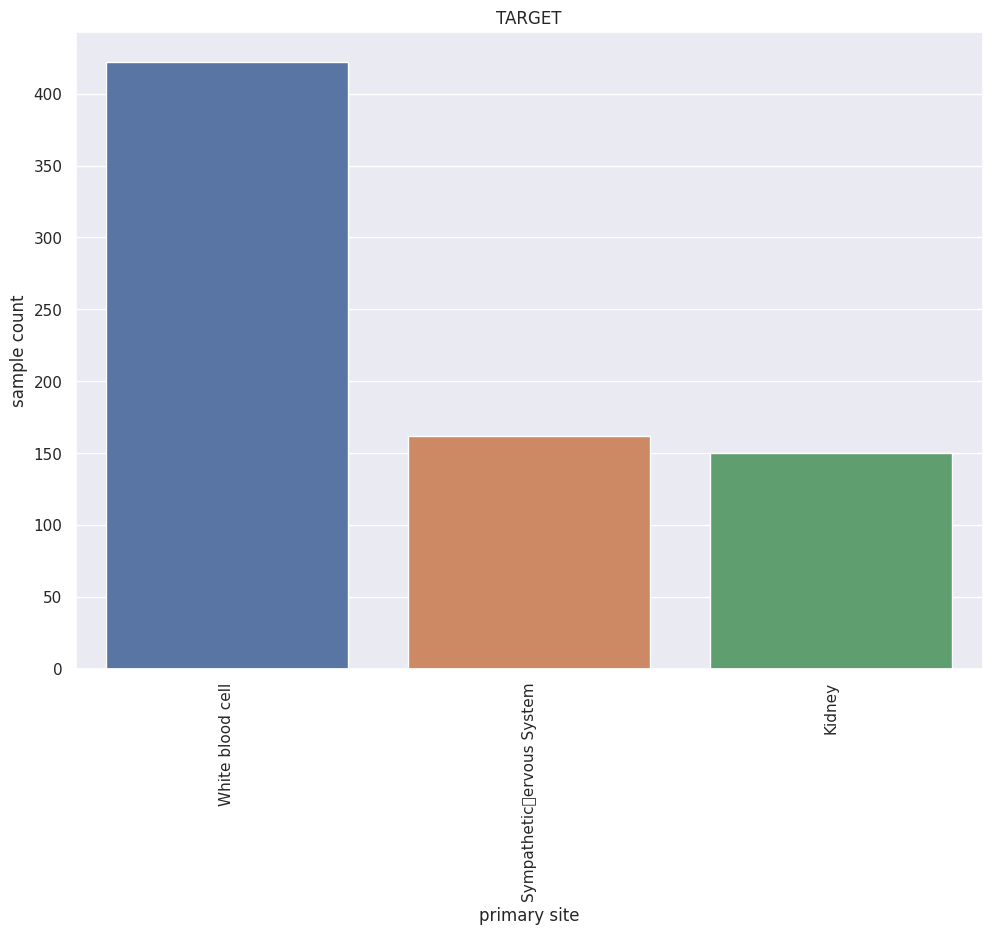

In [46]:
## TARGET sample count
plot_sample_count(pd_df_phenotype, 'TARGET')